In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("athlete_events.csv")

# Olympic Data EDA
---
1. Data Exploration
2. Data Cleaning
3. Select Top 10 popular Sports for Analysis
4. Split the DataFrame by Gender
5. Data Cleaning: Filling in NULL values for Medals, Height and Weight of Athletes

## Data Exploration

In [3]:
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [4]:
data.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [5]:
data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

## Data Cleaning

In [6]:
#As the scope of our problem focuses on the summer olympics, we will drop those that took place in the winter
data.drop(data[data.Season == 'Winter'].index, inplace=True)

#We will narrow our scope down to the past 5 olympics i.e. 2000, 2004, 2008, 2012, 2016
data.drop(data[data.Year < 2000].index, inplace = True)

## Choosing 9 Sports for Analysis

In [7]:
data.Sport.value_counts().head(60)

Athletics                11673
Swimming                  8214
Gymnastics                5000
Cycling                   3192
Shooting                  2849
Rowing                    2783
Football                  2225
Canoeing                  2177
Sailing                   1962
Judo                      1941
Hockey                    1866
Equestrianism             1711
Fencing                   1695
Handball                  1694
Wrestling                 1684
Boxing                    1436
Basketball                1428
Volleyball                1415
Tennis                    1326
Water Polo                1257
Weightlifting             1255
Table Tennis              1250
Archery                   1012
Diving                     975
Badminton                  968
Taekwondo                  606
Synchronized Swimming      586
Baseball                   574
Triathlon                  529
Beach Volleyball           480
Rhythmic Gymnastics        454
Softball                   358
Modern P

In [8]:
sports = ['Swimming', 'Basketball', 'Hockey', 'Football', 'Athletics', 'Weightlifting', 'Tennis', 'Archery',
'Badminton']

In [9]:
#Creating a new dataframe consisting of these 10 sports only
new_data = pd.DataFrame()
for item in sports:
    new_data = new_data.append(data[data['Sport']==item])
new_data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
103,36,Stefan Remco Aartsen,M,25.0,194.0,78.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 100 metres Butterfly,NaN
104,36,Stefan Remco Aartsen,M,25.0,194.0,78.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 200 metres Butterfly,NaN
165,68,Pablo Martn Abal,M,23.0,178.0,76.0,Argentina,ARG,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 100 metres Butterfly,NaN
166,68,Pablo Martn Abal,M,23.0,178.0,76.0,Argentina,ARG,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 4 x 100 metres Medley Relay,NaN
244,120,Mohammed Abbas Sabih,M,26.0,170.0,70.0,Iraq,IRQ,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 100 metres Freestyle,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269792,134990,Misha Zilberman,M,27.0,171.0,61.0,Israel,ISR,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Men's Singles,NaN
270922,135484,Nikolay Vladimirovich Zuyev,M,37.0,180.0,83.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Badminton,Badminton Mixed Doubles,NaN
271022,135528,Marc Zwiebler,M,24.0,181.0,75.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Badminton,Badminton Men's Singles,NaN
271023,135528,Marc Zwiebler,M,28.0,181.0,75.0,Germany,GER,2012 Summer,2012,Summer,London,Badminton,Badminton Men's Singles,NaN


## Further Separating the DataFrame by Gender
- <h4>as males and females have different biological physiology, we will separate them for a more accurate representation of the factors we are going to analyse 

In [10]:
male_data = new_data[new_data['Sex']=='M'].reset_index()
male_data.drop(columns = 'index', inplace=True)

female_data = new_data[new_data['Sex']=='F'].reset_index()
female_data.drop(columns='index', inplace=True)

## Replacing Null Values in the Medal Column for Athletes who did not Win

In [11]:
male_data['Medal'].fillna('NA', inplace=True)
female_data['Medal'].fillna('NA', inplace=True)

## Filling in Null Values for Height and Weight

In [12]:
male_data.isnull().sum()

ID          0
Name        0
Sex         0
Age         0
Height    254
Weight    283
Team        0
NOC         0
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
dtype: int64

In [13]:
female_data.isnull().sum()

ID          0
Name        0
Sex         0
Age         0
Height    139
Weight    159
Team        0
NOC         0
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
dtype: int64

In [14]:
maleSwimming = male_data[male_data.Sport == 'Swimming']
maleBasketball = male_data[male_data.Sport == 'Basketball']
maleHockey = male_data[male_data.Sport == 'Hockey']
maleFootball = male_data[male_data.Sport == 'Football']
maleAthletics =male_data[male_data.Sport == 'Athletics']
maleWeightlifting = male_data[male_data.Sport == 'Weightlifting']
maleTennis = male_data[male_data.Sport == 'Tennis']
maleArchery = male_data[male_data.Sport == 'Archery']
maleBadminton = male_data[male_data.Sport == 'Badminton']

maleDfList = [maleSwimming, maleBasketball, maleHockey, maleFootball, maleAthletics, maleWeightlifting, maleTennis, maleArchery, maleBadminton]

In [15]:
femaleSwimming = female_data[female_data.Sport == 'Swimming']
femaleBasketball = female_data[female_data.Sport == 'Basketball']
femaleHockey = female_data[female_data.Sport == 'Hockey']
femaleFootball = female_data[female_data.Sport == 'Football']
femaleAthletics = female_data[female_data.Sport == 'Athletics']
femaleWeightlifting = female_data[female_data.Sport == 'Weightlifting']
femaleTennis = female_data[female_data.Sport == 'Tennis']
femaleArchery = female_data[female_data.Sport == 'Archery']
femaleBadminton = female_data[female_data.Sport == 'Badminton']

femaleDfList = [femaleSwimming, femaleBasketball, femaleHockey, femaleFootball, femaleAthletics, femaleWeightlifting, femaleTennis, femaleArchery, femaleBadminton]

In [16]:
NOClist = []
for index, rows in data.iterrows():
    if rows.NOC not in NOClist:
        NOClist.append(rows.NOC)


def getAvg2(df, NOC):
    newDF = df[df.NOC==NOC]
    return newDF.Height.describe()[1], newDF.Weight.describe()[1]

In [17]:
for df in maleDfList:
    for NOC in NOClist:
        height, weight = getAvg2(df, NOC)
        df['Height'].fillna(height, inplace=True)
        df['Weight'].fillna(weight, inplace = True)

/Users/nicolelow/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [18]:
for df in femaleDfList:
    for NOC in NOClist:
        height, weight = getAvg2(df, NOC)
        df['Height'].fillna(height, inplace=True)
        df['Weight'].fillna(weight, inplace = True)

In [19]:
clean_male_df = pd.DataFrame()
for df in maleDfList:
    clean_male_df = pd.concat([clean_male_df, df], axis=0)

clean_female_df = pd.DataFrame()
for df in femaleDfList:
    clean_female_df = pd.concat([clean_female_df, df], axis=0)

In [20]:
clean_male_df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [22]:
clean_female_df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

## Data Visualization

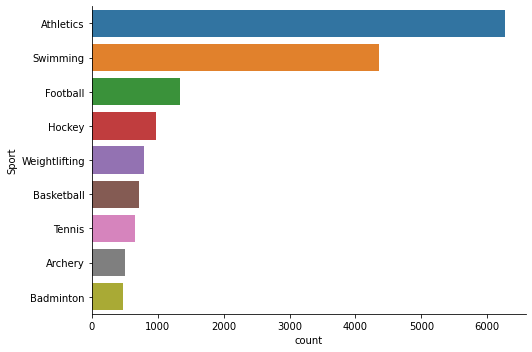

In [23]:
#Count of the 10 chosen sports
sb.catplot(y = "Sport", data = clean_male_df, kind = 'count', order = clean_male_df.Sport.value_counts().index, aspect = 1.5)

In [24]:
#Numeric data
m_numeric_data = pd.DataFrame(clean_male_df[["Age", "Height", "Weight"]])
m_numeric_data.describe()

,Age,Height,Weight
count,16087.000000,16087.000000,16087.000000
mean,25.012930,182.966683,79.014879
std,4.460662,9.541463,14.823423
min,13.000000,140.000000,45.000000
25%,22.000000,177.000000,70.000000
50%,24.000000,183.000000,77.000000
75%,28.000000,189.000000,85.000000
max,62.000000,226.000000,170.000000


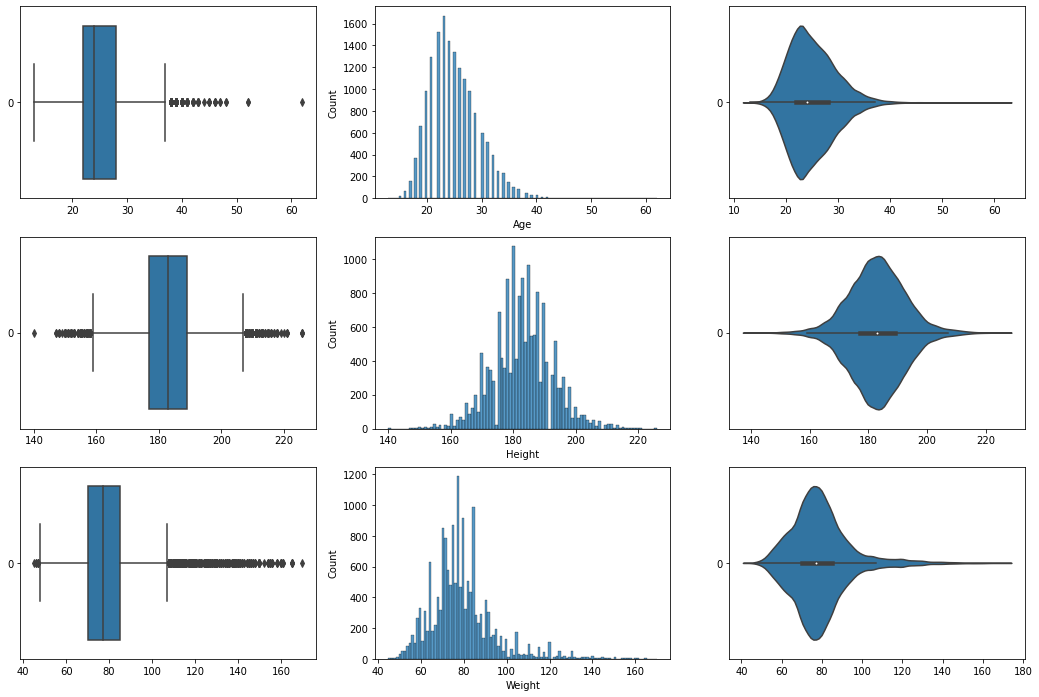

In [25]:
f, axes = plt.subplots(3, 3, figsize=(18, 12))

count = 0
for var in m_numeric_data:
    sb.boxplot(data = m_numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = m_numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = m_numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1

<AxesSubplot:xlabel='Age', ylabel='Medal'>

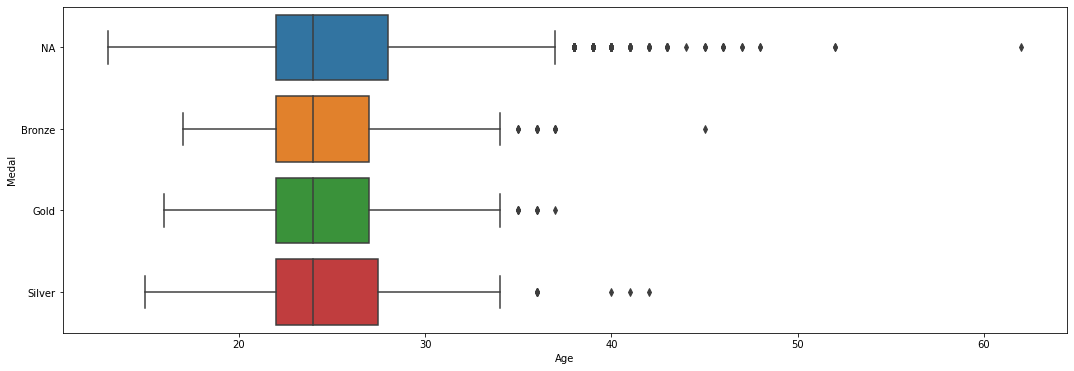

In [26]:
#boxplot for age and medal
age_medal = pd.concat([clean_male_df.Age, clean_male_df.Medal], axis=1).reindex(clean_male_df.Age.index)
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "Age", y = "Medal", data = age_medal, orient = "h")

<AxesSubplot:xlabel='Height', ylabel='Medal'>

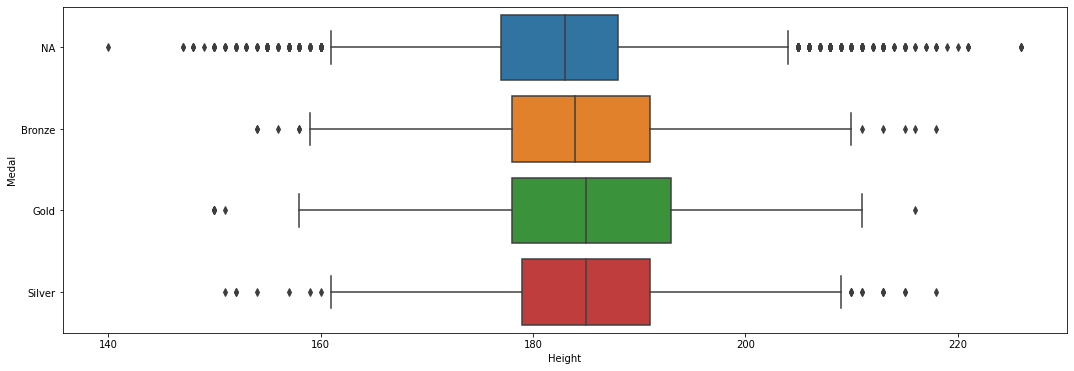

In [27]:
#boxplot for height and medal
height_medal = pd.concat([clean_male_df.Height, clean_male_df.Medal], axis=1).reindex(clean_male_df.Height.index)
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "Height", y = "Medal", data = height_medal, orient = "h")

<AxesSubplot:xlabel='Weight', ylabel='Medal'>

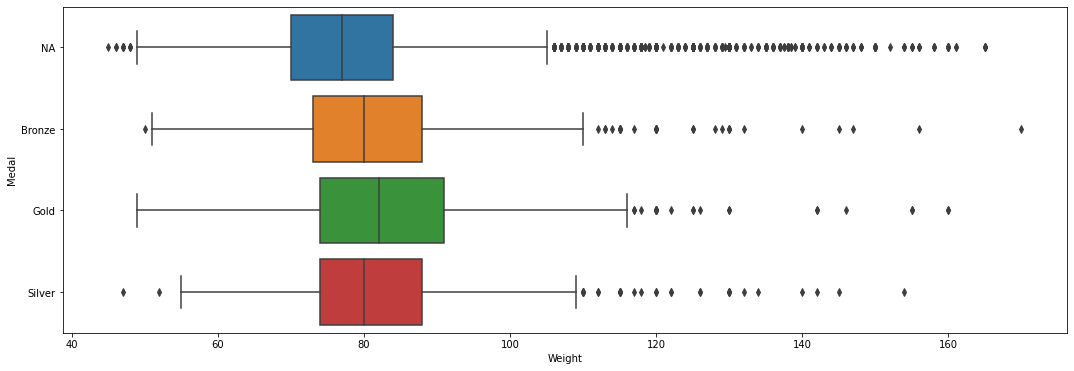

In [28]:
#boxplot for weight and medal
weight_medal = pd.concat([clean_male_df.Weight, clean_male_df.Medal], axis=1).reindex(clean_male_df.Weight.index)
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "Weight", y = "Medal", data = weight_medal, orient = "h")